# Wine Quality Classifier Building

## Exploring the datasets


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_white = pd.read_csv('data/winequality-white.csv')
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
df_red = pd.read_csv('data/winequality-red.csv')
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [5]:
df_white.columns, df_red.columns

(Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object'),
 Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object'))

In [6]:
import re


# Splitting all data into appropriate columns
def normalize_dataframe_view(df):
    new_df = df_white.iloc[:, 0].str.split(';', expand=True)
    column_names = df_white.columns.astype(str)[0].split(';')

    quotes = r'"'
    space = r'\s'
    for col_num in range(len(column_names)):
        without_quotation = re.sub(quotes, '', column_names[col_num])
        new_col_name = re.sub(space, '_', without_quotation)
        column_names[col_num] = new_col_name

    new_df.columns = column_names

    return new_df

In [7]:
data_white, data_red = normalize_dataframe_view(df_white), normalize_dataframe_view(df_red)
data_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [8]:
data_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


## Data Processing

In [9]:
data_white.dtypes, data_red.dtypes

(fixed_acidity           object
 volatile_acidity        object
 citric_acid             object
 residual_sugar          object
 chlorides               object
 free_sulfur_dioxide     object
 total_sulfur_dioxide    object
 density                 object
 pH                      object
 sulphates               object
 alcohol                 object
 quality                 object
 dtype: object,
 fixed_acidity           object
 volatile_acidity        object
 citric_acid             object
 residual_sugar          object
 chlorides               object
 free_sulfur_dioxide     object
 total_sulfur_dioxide    object
 density                 object
 pH                      object
 sulphates               object
 alcohol                 object
 quality                 object
 dtype: object)

In [10]:
# Change the data type in dataframes
def change_data_type(df):
    for col in df.columns:
        df[col] = df[col].astype(float)

    return df


data_white, data_red = change_data_type(data_white), change_data_type(data_red)
data_white.dtypes, data_red.dtypes

(fixed_acidity           float64
 volatile_acidity        float64
 citric_acid             float64
 residual_sugar          float64
 chlorides               float64
 free_sulfur_dioxide     float64
 total_sulfur_dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                 float64
 dtype: object,
 fixed_acidity           float64
 volatile_acidity        float64
 citric_acid             float64
 residual_sugar          float64
 chlorides               float64
 free_sulfur_dioxide     float64
 total_sulfur_dioxide    float64
 density                 float64
 pH                      float64
 sulphates               float64
 alcohol                 float64
 quality                 float64
 dtype: object)

In [11]:
data_white.isna().sum(), data_red.isna().sum()

(fixed_acidity           0
 volatile_acidity        0
 citric_acid             0
 residual_sugar          0
 chlorides               0
 free_sulfur_dioxide     0
 total_sulfur_dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 fixed_acidity           0
 volatile_acidity        0
 citric_acid             0
 residual_sugar          0
 chlorides               0
 free_sulfur_dioxide     0
 total_sulfur_dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64)

In [12]:
# Creation one dataframe for both types of the wine
data_white.insert(0, 'color', 'white')
data_red.insert(0, 'color', 'red')
data_wine = pd.concat([data_white, data_red], ignore_index=True)
data_wine

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,red,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
9792,red,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
9793,red,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
9794,red,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [13]:
numerical_features = data_wine.columns[1:-1]
for feature_name in numerical_features:
    max_value = data_wine[feature_name].max()
    min_value = data_wine[feature_name].min()
    data_wine[feature_name] = (data_wine[feature_name] - min_value) / (max_value - min_value)

data_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,5.877909
std,0.081137,0.098813,0.072900,0.077788,0.064827,0.059255,0.098598,0.057659,0.137266,0.132698,0.198477,0.885593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088876,0.336364,0.220930,0.241935,5.000000
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,6.000000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


label_encoder = LabelEncoder()
data_wine['color'] = label_encoder.fit_transform(data_wine['color'])

min_max_scaler = MinMaxScaler(feature_range=(1, 10))
data_wine['quality'] = min_max_scaler.fit_transform(data_wine[['quality']])

data_wine.describe()

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_

,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000,9796.000000
mean,0.500000,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,5.316864
std,0.500026,0.081137,0.098813,0.072900,0.077788,0.064827,0.059255,0.098598,0.057659,0.137266,0.132698,0.198477,1.328390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088876,0.336364,0.220930,0.241935,4.000000
50%,0.500000,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,5.500000
75%,1.000000,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,5.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


Since the total acidity is computed as the sum of the fixed acidity and the volatile acidity, these columns are replaced by a single one.

In [15]:
data_wine = data_wine.drop('citric_acid', axis=1)
data_wine.insert(1, 'acidity', data_wine['fixed_acidity'] + data_wine['volatile_acidity'])
data_wine = data_wine.drop(['fixed_acidity', 'volatile_acidity'], axis=1)
data_wine.head()

,color,acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,0.493967,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,5.5
1,1,0.456071,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,5.5
2,1,0.609540,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,5.5
3,1,0.473982,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,5.5
4,1,0.473982,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,5.5


In [16]:
data_wine.duplicated().sum(), data_wine.shape

(1874, (9796, 11))

In [17]:
data_wine.drop_duplicates(inplace=True)
data_wine.duplicated().sum()

0

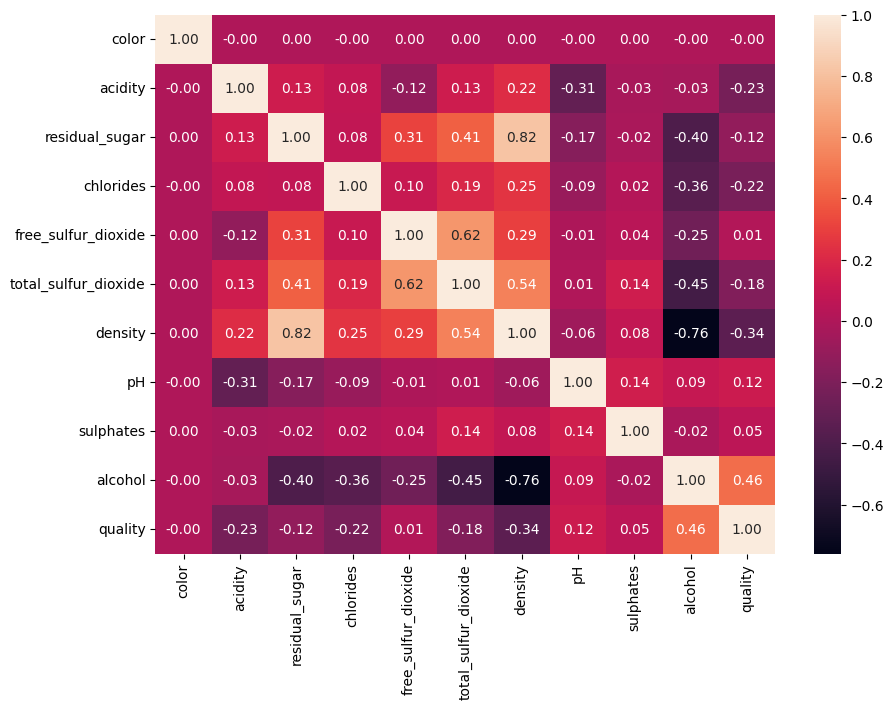

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
dataplot = sns.heatmap(data_wine.corr(), annot=True, fmt='.2f')

In most cases the wine composition on the labels consists only the percentage of alcohol and the sugar, so other features are removed.

In [19]:
del data_wine['color']
del data_wine['acidity']
del data_wine['chlorides']
del data_wine['free_sulfur_dioxide']
del data_wine['total_sulfur_dioxide']
del data_wine['sulphates']
del data_wine['density']
del data_wine['pH']

In [20]:
X = data_wine.drop(['quality'], axis=1)
y = data_wine.quality

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [22]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE(random_state=42)
X, y = oversample.fit_resample(X, y)
X.shape, y.shape

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


((25032, 2), (25032,))

In [23]:
new_min_max_scaler = MinMaxScaler(feature_range=(1, 10))
y = new_min_max_scaler.fit_transform(y.reshape(-1, 1))
y = y.reshape(y.shape[0])
y = y.round(0)
y = y.astype(object)
y

array([6.0, 6.0, 6.0, ..., 10.0, 10.0, 10.0], dtype=object)

## Building Classifier

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20025, 2), (20025,), (5007, 2), (5007,))

In [26]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

In [27]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=600, max_features="sqrt")
rf = rf.fit(X_train, y_train)

In [29]:
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", round(accuracy*100, 2), "%")

Accuracy: 81.53 %


# Labels text recognition

In [31]:
import cv2
import pytesseract
import numpy as np

In [32]:
def get_composition(image):
    """
    Get text from the wine label photo.
    """

    label_text = pytesseract.image_to_string(image, lang='ukr')

    return label_text

In [195]:
def find_features(text):
    """
    Find the percentage of alcohol and sugar in the wine.
    """

    patterns = {
        "alcohol" : r"(?i)" + r"(Міцність|спирту:|\nспирту|спирту)" + r"(.{6})",  
        "sugar" : r"(?i)" + r"(цукру|Цукор|\nцукру:|цукру:)" + r"(.{6})"
    }

    matches = {}
    for idx, pattern in patterns.items():
        match = re.search(pattern, text)
        if match:
            matches[idx] = match.group(2)

    return matches["alcohol"], matches["sugar"]
    


In [34]:
def get_alcohol_number(alcohol):
    """
    Convert the found alcohol percentage into the number.
    """

    pattern = r"[0-9]+(?:\.[0-9]+)?"
    match = re.search(pattern, alcohol[0])
    if match:
        return float(match.group(0))
    else:
        return 0


In [35]:
def get_sugar_number(sugar):
    """
    Convert the found sugar percentage into the number
    """
    
    pattern = r"[0-9]+(?:\.[0-9]+)?"
    match = re.search(pattern, sugar[0])
    if match:
        return float(match.group(0))
    else:
        return 0

In [36]:
def evaluate_quality(image):
    composition = get_composition(image)
    alcohol, sugar = find_features(composition)
    alcohol_number = get_alcohol_number(alcohol)
    sugar_number = get_sugar_number(sugar)

    features = np.array([[alcohol_number, sugar_number]])
    score = rf.predict(features)

    return score[0]


In [199]:
im = cv2.imread('photos/1.jpg')
print("Wine score: " + str(evaluate_quality(im)) + "/10.0")

Wine score: 6.0/10.0
